# Email Spam Detection Project using NLP (classification)

### Steps
![](images/ML.png)

### Tools
<img src="images/tools.png" width="70%"/>

### Libraries

In [172]:
# data analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#make plots inline 
%matplotlib inline 

# models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# model evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# nlp text handling
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


# time stam
import time 
print(f"last update: {time.asctime()}")

last update: Tue Jul 16 09:34:53 2024


## 1 . Problem Definition

**Objective**
The objective of this project is to build a machine learning model that can accurately classify emails as either spam (unwanted, unsolicited messages) or ham (legitimate, non-spam messages). This involves leveraging Natural Language Processing (NLP) techniques to preprocess the text data and train a model to distinguish between spam and non-spam emails.

**Motivation**
Email spam detection is crucial for maintaining effective communication and protecting users from malicious content. Automated spam filters help in reducing the clutter in users' inboxes and prevent potential phishing attacks and scams.

## 2. Data

We will use a labeled dataset containing a collection of emails, each labeled as either 'spam' or 'ham'. The dataset typically includes two columns:

* **text**: The content of the email.
* **label**: The classification of the email as 'spam' or 'ham'.
Example of the dataset structure:

```text,label
"Hello, I saw your profile on LinkedIn and I would like to connect with you. Let's discuss business opportunities.",ham
"Congratulations! You've won a 1,000 Walmart gift card. Click here to claim your prize now.",spam



In [42]:
# data to df
df = pd.read_csv("data/spam.csv", encoding="ISO-8859-1")

In [43]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
# Drop the last three columns
df = df.iloc[:, :-3]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [45]:
# change the columns name 
cols = ["target", "message"]
df.columns = cols
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [46]:
# move target to the end 
df = df[['message', 'target']]
df

,message,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


In [47]:
# save and reuse the date as updated file
df.to_csv("data/updated_spam.csv", index=False)

In [89]:
#reuse
df = pd.read_csv("data/updated_spam.csv")
df

,message,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


## 3. Evaluation 

What define the success

## 4. Features

What Features should we model

### Data Analysis 

Data analysis is the process of inspecting, cleaning, transforming, and modeling data with the goal of discovering useful information, drawing conclusions, and supporting decision-making. It involves various techniques and methods to understand and interpret the data, uncover patterns, trends, and relationships, and make informed decisions based on the analysis.

In [49]:
df.shape

(5572, 2)

In [50]:
df.dtypes

message    object
target     object
dtype: object

In [53]:
#check null values
df.isna().sum()

message    0
target     0
dtype: int64

In [54]:
df.describe()

,message,target
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [64]:
targets =df.target.unique()
targets

array(['ham', 'spam'], dtype=object)

In [57]:
ratio =df.target.value_counts()
ratio

ham     4825
spam     747
Name: target, dtype: int64

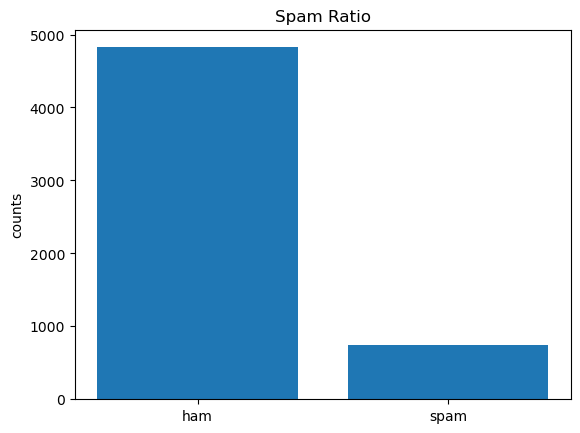

In [66]:
# plot this ratio
fig, ax = plt.subplots()

#data
ax.bar(targets,ratio)

# customize
ax.set(title="Spam Ratio", ylabel="counts")

# save plot
fig.savefig("images/spam ratio in dataset.png")

# show
plt.show()

it seem like we have less amount of **spam** the **ham**

### Data Preprocessing

In [90]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunrise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunrise\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
stop_words = set(stopwords.words('english'))

In [102]:
def preprocess_text(text):
    
    #replace all non text char's with space
    text = re.sub(r'\W+', ' ', text)
    
    #replace multiple space with single spacw
    text = re.sub(r'\s+',' ', text)

    #convert all text to lower case
    text = text.lower()
    
    # make tokens 
    tokens = word_tokenize(text)
    
    #filter the token and remove stopwords
    fil_tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(fil_tokens)

In [103]:
df["processed_message"] = df["message"].apply(preprocess_text)

In [104]:
df

,message,target,processed_message
0,"Go until jurong point, crazy.. Available only ...",ham,go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ham,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,ham,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",ham,nah think goes usf lives around though
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam,2nd time tried 2 contact u u å 750 pound prize...
5568,Will Ì_ b going to esplanade fr home?,ham,ì_ b going esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",ham,pity mood suggestions
5570,The guy did some bitching but I acted like i'd...,ham,guy bitching acted like interested buying some...


## 5. Model

### feature extraction

In [111]:
vectorizer = TfidfVectorizer(max_features=3000)
x = vectorizer.fit_transform(df['processed_message']).toarray()
y = df['target'].apply(lambda x: 1 if x == 'spam' else 0).values

### splitting

In [132]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### modeling

In [161]:
models = {
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "SVC": SVC(),
        "RandomForestClassifier": RandomForestClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "MLPClassifier": MLPClassifier(max_iter=1000)
    }

In [162]:
def fit_and_score_models(models, xtrain, ytrain, xtest, ytest):

    
    scores = {}
    for name, model in models.items():
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        score = accuracy_score(ytest, ypred)
        scores[name] = score
    
    return scores


In [163]:
%%time
## fit the models 

scores = fit_and_score_models(models, xtrain, ytrain, xtest, ytest)
print(scores)

{'MultinomialNB': 0.9811659192825112, 'BernoulliNB': 0.9802690582959641, 'LogisticRegression': 0.957847533632287, 'SVC': 0.9766816143497757, 'RandomForestClassifier': 0.9766816143497757, 'GradientBoostingClassifier': 0.967713004484305, 'DecisionTreeClassifier': 0.9739910313901345, 'KNeighborsClassifier': 0.9183856502242153, 'MLPClassifier': 0.9811659192825112}
CPU times: total: 4min 56s
Wall time: 4min 10s


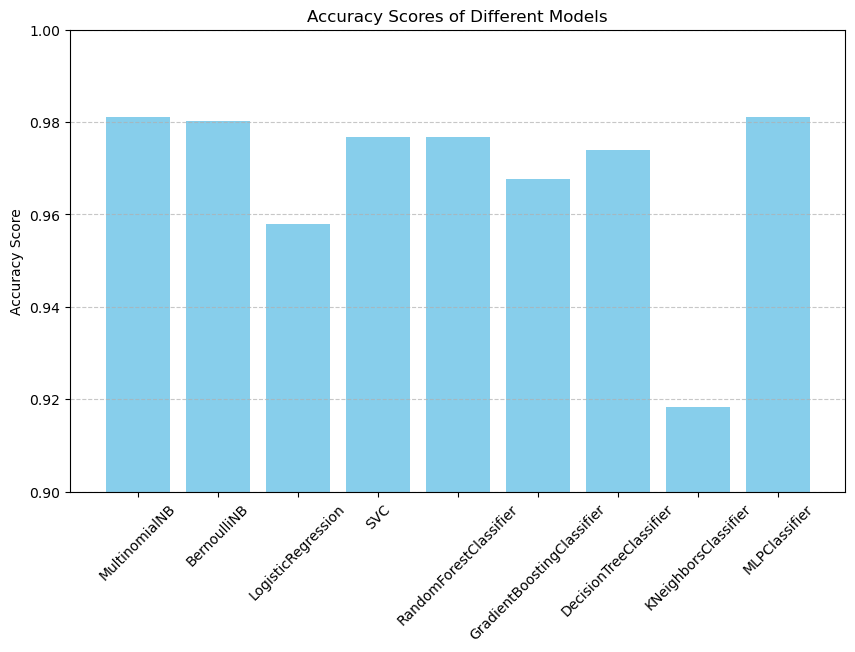

In [170]:
# Plotting the accuracies vertically
plt.figure(figsize=(10, 6))
plt.bar(list(scores.keys()), list(scores.values()), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.9, 1.0)  # Adjust limits if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better visualization


# Save the plot as a PNG file
plt.savefig('images/model_accuracies.png', bbox_inches='tight')

plt.show()

highest score: 
   ### 'MultinomialNB': 0.9811659192825112

In [171]:
model = MultinomialNB()
model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f"Accuracy: {accuracy_score(ytest, ypred)}")

Accuracy: 0.9811659192825112


In [175]:
cm = confusion_matrix(ytest, ypred)
report= classification_report(ytest, ypred)

In [176]:
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[964   1]
 [ 20 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



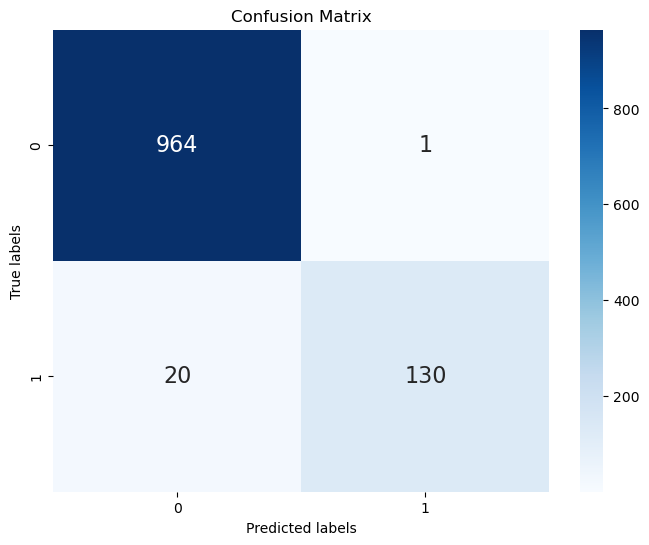

In [178]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("images/confusion_matrix.png")

plt.show()


## 6. Saving the model 

In [179]:
import joblib

# Save the model to a file
joblib.dump(model, 'model/spam_detection_model.pkl')

['model/spam_detection_model.pkl']